Load Packages and data

In [3]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
df=pd.read_csv("https://raw.githubusercontent.com/ctkrall/stat6289/main/TSLA.csv")
print("Number of rows and columns:", df.shape)
df.head(5)

Number of rows and columns: (1259, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
1,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
2,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
3,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000
4,2015-07-16,52.844002,53.439999,52.632000,53.335999,53.335999,8080000


Split Data into training and test sets

In [4]:
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

Build input features with lags 1 day, 7 days, and 14 days

In [9]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)


In [10]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train1 = []
y_train1 = []
for i in range(60, 800):
    X_train1.append(training_set_scaled[i-60:i-7, 0])
    y_train1.append(training_set_scaled[i, 0])
X_train1, y_train1 = np.array(X_train1), np.array(y_train1)
X_train1 = np.reshape(X_train1, (X_train1.shape[0], X_train1.shape[1], 1))
#(740, 60, 1)


In [11]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train2 = []
y_train2 = []
for i in range(60, 800):
    X_train2.append(training_set_scaled[i-60:i-14, 0])
    y_train2.append(training_set_scaled[i, 0])
X_train2, y_train2 = np.array(X_train2), np.array(y_train2)
X_train2 = np.reshape(X_train2, (X_train2.shape[0], X_train2.shape[1], 1))
#(740, 60, 1)


Build LSTM model

In [12]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.5))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.5))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = False))
model.add(Dropout(0.5))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 25, batch_size = 32)

Epoch 1/25
24/24 [==============================] - 8s 101ms/step - loss: 0.0619
Epoch 2/25
24/24 [==============================] - 2s 101ms/step - loss: 0.0247
Epoch 3/25
24/24 [==============================] - 2s 100ms/step - loss: 0.0230
Epoch 4/25
24/24 [==============================] - 2s 102ms/step - loss: 0.0186
Epoch 5/25
24/24 [==============================] - 2s 101ms/step - loss: 0.0165
Epoch 6/25
24/24 [==============================] - 2s 99ms/step - loss: 0.0188
Epoch 7/25
24/24 [==============================] - 2s 100ms/step - loss: 0.0168
Epoch 8/25
24/24 [==============================] - 2s 100ms/step - loss: 0.0162
Epoch 9/25
24/24 [==============================] - 2s 100ms/step - loss: 0.0148
Epoch 10/25
24/24 [==============================] - 2s 101ms/step - loss: 0.0155
Epoch 11/25
24/24 [==============================] - 2s 100ms/step - loss: 0.0126
Epoch 12/25
24/24 [==============================] - 2s 99ms/step - loss: 0.0145
Epoch 13/25
24/24 [========

In [ ]:
model1 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train1.shape[1], 1)))
model1.add(Dropout(0.5))
# Adding a second LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True))
model1.add(Dropout(0.5))
# Adding a third LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = False))
model1.add(Dropout(0.5))
# Adding the output layer
model1.add(Dense(units = 1))

# Compiling the RNN
model1.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model1.fit(X_train1, y_train1, epochs = 25, batch_size = 32)

Epoch 1/25
24/24 [==============================] - 7s 80ms/step - loss: 0.0910
Epoch 2/25
24/24 [==============================] - 2s 80ms/step - loss: 0.0294
Epoch 3/25
24/24 [==============================] - 2s 83ms/step - loss: 0.0256
Epoch 4/25
24/24 [==============================] - 2s 81ms/step - loss: 0.0218
Epoch 5/25
24/24 [==============================] - 2s 80ms/step - loss: 0.0221
Epoch 6/25
24/24 [==============================] - 2s 81ms/step - loss: 0.0251
Epoch 7/25
24/24 [==============================] - 2s 79ms/step - loss: 0.0263
Epoch 8/25
24/24 [==============================] - 2s 87ms/step - loss: 0.0272
Epoch 9/25
24/24 [==============================] - 2s 79ms/step - loss: 0.0212
Epoch 10/25
24/24 [==============================] - 2s 84ms/step - loss: 0.0199
Epoch 11/25
24/24 [==============================] - 2s 80ms/step - loss: 0.0188
Epoch 12/25
24/24 [==============================] - 2s 80ms/step - loss: 0.0207
Epoch 13/25
24/24 [==================

In [ ]:
model2 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train2.shape[1], 1)))
model2.add(Dropout(0.5))
# Adding a second LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50, return_sequences = True))
model2.add(Dropout(0.5))
# Adding a third LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50, return_sequences = False))
model2.add(Dropout(0.5))
# Adding the output layer
model2.add(Dense(units = 1))

# Compiling the RNN
model2.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model2.fit(X_train2, y_train2, epochs = 25, batch_size = 32)

Epoch 1/25
24/24 [==============================] - 7s 70ms/step - loss: 0.0767
Epoch 2/25
24/24 [==============================] - 2s 71ms/step - loss: 0.0333
Epoch 3/25
24/24 [==============================] - 2s 71ms/step - loss: 0.0287
Epoch 4/25
24/24 [==============================] - 2s 72ms/step - loss: 0.0278
Epoch 5/25
24/24 [==============================] - 2s 71ms/step - loss: 0.0274
Epoch 6/25
24/24 [==============================] - 2s 70ms/step - loss: 0.0245
Epoch 7/25
24/24 [==============================] - 2s 71ms/step - loss: 0.0246
Epoch 8/25
24/24 [==============================] - 2s 72ms/step - loss: 0.0242
Epoch 9/25
24/24 [==============================] - 2s 72ms/step - loss: 0.0235
Epoch 10/25
24/24 [==============================] - 2s 71ms/step - loss: 0.0223
Epoch 11/25
24/24 [==============================] - 2s 74ms/step - loss: 0.0231
Epoch 12/25
24/24 [==============================] - 2s 71ms/step - loss: 0.0238
Epoch 13/25
24/24 [==================

In [13]:
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(459, 60, 1)


In [ ]:
X_test1 = []
for i in range(60, 519):
    X_test1.append(inputs[i-60:i-7, 0])
X_test1 = np.array(X_test1)
X_test1 = np.reshape(X_test1, (X_test1.shape[0], X_test1.shape[1], 1))
print(X_test1.shape)

(459, 53, 1)


In [ ]:
X_test2 = []
for i in range(60, 519):
    X_test2.append(inputs[i-60:i-14, 0])
X_test2 = np.array(X_test2)
X_test2 = np.reshape(X_test2, (X_test2.shape[0], X_test2.shape[1], 1))
print(X_test2.shape)

(459, 46, 1)


In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
predicted_stock_price1 = model1.predict(X_test1)
predicted_stock_price1 = sc.inverse_transform(predicted_stock_price1)

In [ ]:
predicted_stock_price2 = model2.predict(X_test2)
predicted_stock_price2 = sc.inverse_transform(predicted_stock_price2)

Results: Visualizations

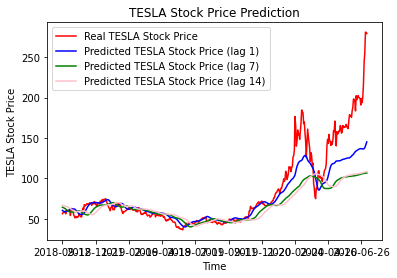

In [ ]:
# Visualising the results
plt.plot(df.loc[800:, "Date"],dataset_test.values, color = "red", label = "Real TESLA Stock Price")
plt.plot(df.loc[800:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price (lag 1)")
plt.plot(df.loc[800:, "Date"],predicted_stock_price1, color = "green", label = "Predicted TESLA Stock Price (lag 7)")
plt.plot(df.loc[800:, "Date"],predicted_stock_price2, color = "pink", label = "Predicted TESLA Stock Price (lag 14)")
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

Comparison to other models
1) Dropout lowered

In [ ]:
modeldr = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
modeldr.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
modeldr.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
modeldr.add(LSTM(units = 50, return_sequences = True))
modeldr.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
modeldr.add(LSTM(units = 50, return_sequences = False))
modeldr.add(Dropout(0.2))
# Adding the output layer
modeldr.add(Dense(units = 1))

# Compiling the RNN
modeldr.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
modeldr.fit(X_train, y_train, epochs = 25, batch_size = 32)

Epoch 1/25
24/24 [==============================] - 7s 90ms/step - loss: 0.0636
Epoch 2/25
24/24 [==============================] - 2s 90ms/step - loss: 0.0138
Epoch 3/25
24/24 [==============================] - 2s 91ms/step - loss: 0.0097
Epoch 4/25
24/24 [==============================] - 2s 91ms/step - loss: 0.0102
Epoch 5/25
24/24 [==============================] - 2s 89ms/step - loss: 0.0099
Epoch 6/25
24/24 [==============================] - 2s 92ms/step - loss: 0.0105
Epoch 7/25
24/24 [==============================] - 2s 91ms/step - loss: 0.0107
Epoch 8/25
24/24 [==============================] - 2s 90ms/step - loss: 0.0095
Epoch 9/25
24/24 [==============================] - 2s 90ms/step - loss: 0.0082
Epoch 10/25
24/24 [==============================] - 2s 91ms/step - loss: 0.0095
Epoch 11/25
24/24 [==============================] - 2s 92ms/step - loss: 0.0074
Epoch 12/25
24/24 [==============================] - 2s 91ms/step - loss: 0.0077
Epoch 13/25
24/24 [==================

In [ ]:
predicted_stock_pricedr = modeldr.predict(X_test)
predicted_stock_pricedr = sc.inverse_transform(predicted_stock_pricedr)

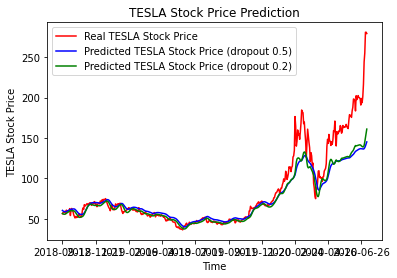

In [ ]:
# Visualising the results
plt.plot(df.loc[800:, "Date"],dataset_test.values, color = "red", label = "Real TESLA Stock Price")
plt.plot(df.loc[800:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price (dropout 0.5)")
plt.plot(df.loc[800:, "Date"],predicted_stock_pricedr, color = "green", label = "Predicted TESLA Stock Price (dropout 0.2)")
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

The lower dropout values makes the model less smooth. The predictions are of similar values, but the model with lower dropout follows closer to the actual values.

2) Add another hidden layer

In [ ]:
model4 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model4.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model4.add(Dropout(0.5))
# Adding a second LSTM layer and some Dropout regularisation
model4.add(LSTM(units = 50, return_sequences = True))
model4.add(Dropout(0.5))
# Adding a third LSTM layer and some Dropout regularisation
model4.add(LSTM(units = 50, return_sequences = True))
model4.add(Dropout(0.5))
# Adding a fourth LSTM layer and some Dropout regularisation
model4.add(LSTM(units = 50, return_sequences = False))
model4.add(Dropout(0.5))
# Adding the output layer
model4.add(Dense(units = 1))

# Compiling the RNN
model4.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model4.fit(X_train, y_train, epochs = 25, batch_size = 32)

Epoch 1/25
24/24 [==============================] - 10s 121ms/step - loss: 0.0798
Epoch 2/25
24/24 [==============================] - 3s 126ms/step - loss: 0.0263
Epoch 3/25
24/24 [==============================] - 3s 122ms/step - loss: 0.0242
Epoch 4/25
24/24 [==============================] - 3s 124ms/step - loss: 0.0214
Epoch 5/25
24/24 [==============================] - 3s 122ms/step - loss: 0.0220
Epoch 6/25
24/24 [==============================] - 3s 122ms/step - loss: 0.0175
Epoch 7/25
24/24 [==============================] - 3s 124ms/step - loss: 0.0189
Epoch 8/25
24/24 [==============================] - 3s 122ms/step - loss: 0.0176
Epoch 9/25
24/24 [==============================] - 3s 126ms/step - loss: 0.0182
Epoch 10/25
24/24 [==============================] - 3s 126ms/step - loss: 0.0178
Epoch 11/25
24/24 [==============================] - 3s 123ms/step - loss: 0.0167
Epoch 12/25
24/24 [==============================] - 3s 123ms/step - loss: 0.0157
Epoch 13/25
24/24 [=====

In [ ]:
predicted_stock_price4 = model4.predict(X_test)
predicted_stock_price4 = sc.inverse_transform(predicted_stock_price4)

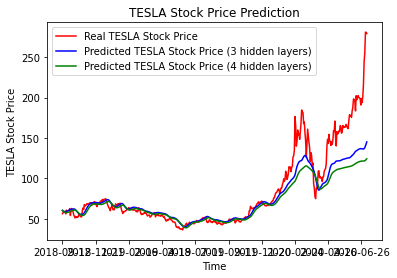

In [ ]:
# Visualising the results
plt.plot(df.loc[800:, "Date"],dataset_test.values, color = "red", label = "Real TESLA Stock Price")
plt.plot(df.loc[800:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price (3 hidden layers)")
plt.plot(df.loc[800:, "Date"],predicted_stock_price4, color = "green", label = "Predicted TESLA Stock Price (4 hidden layers)")
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

As can be seen in the above graph, the model with 3 hidden layers is slightly better a prediction, especially toward the end of the dataset. This is probably because the more hidden layers, the more resilient the model is to extreme values.

Future Predictions for the next two weeks

In [36]:
dfpred = df.iloc[-82:, 1:2].values
predset = sc.fit_transform(dfpred)

In [37]:
import datetime
start = datetime.datetime.strptime("10-07-2020", "%d-%m-%Y")
end = datetime.datetime.strptime("30-09-2020", "%d-%m-%Y")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]
print(len(date_generated))
future = 82

82


In [39]:
pred_list = []
for i in range(future):   
    pred_list.append(model.predict(predset)[0]) 

In [49]:
df_predict = pd.DataFrame()
df_predict['date'] = date_generated
df_predict['prediction'] = sc.inverse_transform(pred_list)


         date  prediction
0  2020-07-10  107.100996
1  2020-07-11  107.100996
2  2020-07-12  107.100996
3  2020-07-13  107.100996
4  2020-07-14  107.100996
..        ...         ...
77 2020-09-25  107.100996
78 2020-09-26  107.100996
79 2020-09-27  107.100996
80 2020-09-28  107.100996
81 2020-09-29  107.100996

[82 rows x 2 columns]
